
<h1><center> <font color='black'>  Network Science (LTAT.02.011) - Homework - 01  </font></center></h1>
<h2><center> <font color='black'> Introduction to Network Analysis</font></center></h3>
<h2><center> <font color='black'> University of Tartu - Spring 2021</font></center></h3>


================================================================================================================

# Homework instructions

- This homework should be done individually.

- Insert your full name and student ID in the field "Student info" below. 

- The accepted submission format is .ipynb file. Please upload the file on moodle.

- The submission will automatically close on **<font color='red'>24th March 2021 at 23:59 pm</font>**, so please make sure you have enough time to submit the homework. 

- You do not necessarily need to work on Colab. Especially as the size and the complexity of datasets will increase through the course, you can install jupyter notebooks locally and work from there.

- If you do not understand what a question is asking for, please ask in Moodle. 


**<h2><font color='red'>Student info:</font></h2>**


<font color='red'>Full name: </font> Canberk Ozen

<font color='red'>Student ID: </font> B97964



# Dataset details:
**The network data consists of trading countries. There are two files. The first file, Nodes.csv file has information about the countries where each row consists of node id and the corresponding country name. The second file (edges.csv) contains information about trading countries. Each row represents two countries which trade which each other.**



# Libraries


In [95]:
# Importing libraries
import igraph as ig
import networkx as nx
from networkx.algorithms import community
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading the datasets

In [146]:
nodes = pd.read_csv('Nodes.csv')
edges = pd.read_csv('edges.csv')

In [147]:
print('Nodes dataset dimension:', nodes.shape, '\nEdges dataset dimension:', edges.shape)

Nodes dataset dimension: (214, 2) 
Edges dataset dimension: (318346, 2)


In [148]:
nodes.head()

,id,Name
0,1,Afghanistan
1,2,Australia
2,3,Austria
3,4,Belgium
4,5,Brazil


In [149]:
edges.head()

,from,to
0,2,1
1,2,2
2,2,3
3,2,4
4,2,6


# 1. Network creation (1.5 points)

**1.1. Create undirected and unweighted network using nodes and edges datasets (0.25 point)**

<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [150]:
G_unweighted_undirected = nx.from_pandas_edgelist(edges, source='from', target='to')

#nx.draw(G_unweighted_undirected, with_labels=True)
#plt.show()

**1.2. Create undirected and weighted network using nodes and edges datasets (0.25 point)**

In [151]:
'''
Hint: Create "weight" column in the "edges" dataframe by grouping on "from" and "to" columns.
'''

edges['weight'] = 0
edges = edges.groupby(['from', 'to']).agg('count').reset_index()

G_weighted_undirected = nx.from_pandas_edgelist(edges, source='from', target='to', edge_attr=['weight'])

**1.3. Create directed and unweighted network using nodes and edges datasets (0.25 point)**

In [152]:
G_unweighted_directed = nx.from_pandas_edgelist(edges, source='from', target='to', edge_attr=None, create_using = nx.DiGraph())

#nx.draw(G_unweighted_directed, with_labels=True)
#plt.show()

**1.4. Create directed and weighted network using nodes and edges datasets (0.25 point)**

In [153]:
G_weighted_directed = nx.from_pandas_edgelist(edges, source='from', target='to', edge_attr = ['weight'], create_using = nx.DiGraph())

**1.5. Check whether undirected and unweighted network is connected or disconected (0.5 point).**

<font color='red'>How you should answer the following questions. First, in the `#TODO` cell you have to write the code representing your solution. And in the `Your answer` cell write the answer in your own words. It does not have to be a full sentence.</font>

In [154]:
nx.is_connected(G_unweighted_undirected)

True

**<font color='red'>Your answer:</font>** The answer is self explanatory. NetworkX lib already has a function for checking the connectedness of undirected graphs; so if our graph is connected it returns true, if not it returns false.

# 2. Network properties (3 points)

## 2.1. Edge density (0.5 points).

**2.1.1. Calculate edge density for undirected and unweighted network (0.125 point); and interpret the result (0.125 point)**

In [155]:
print(nx.classes.function.density(G_unweighted_undirected))

0.41424246413057786


**<font color='red'>Your answer:</font>**  The graph is somewhat sparse, it only has 41 percent of all the potential edges it can have.

**2.1.2. Calculate edge density for directed and unweighted network (0.125 point); and interpret the result (0.125 point)**

In [156]:
print(nx.classes.function.density(G_unweighted_directed))

0.30134702294765475


**<font color='red'>Your answer:</font>** This one is even sparser, it only has 30 percent of all the potential edges it can have.

## 2.2. Clustering coefficient (1 point)

**2.2.1. Calculate average clustering coefficient for undirected and unweighted network (0.125 point); and interpret the result (0.125 point)**

In [157]:
nx.average_clustering(G_unweighted_undirected)

0.8124991062175769

**<font color='red'>Your answer:</font>** This means that on average, 81 percent of all the neighbors of a node is connected in the graph.

**2.2.2. Calculate average clustering coefficient for directed and unweighted network (0.125 point); and interpret the result (0.125 point)**

In [158]:
nx.average_clustering(G_unweighted_directed)

0.7480679346326198

**<font color='red'>Your answer:</font>** This means that on average, 74.8 percent of all the neighbors of a node is connected in the graph.

**2.2.3. Calculate average clustering coefficient for undirected and weighted network (0.125 point); and interpret the result (0.125 point)**

In [159]:
nx.average_clustering(G_weighted_undirected, weight='weight')

0.020960372230510997

**<font color='red'>Your answer:</font>** This means that on average, 2 percent of all the neighbors of a node is connected in the graph. This is a pretty low number, the graph is more dispersed, ie there aren't many triangles for all triplet combinations.

**2.2.4. Calculate average clustering coefficient for directed and weighted network (0.125 point); and interpret the result (0.125 point)**

In [160]:
nx.average_clustering(G_weighted_directed, weight='weight')

0.027253706865302565

**<font color='red'>Your answer:</font>** This means that on average, 2.7 percent of all the neighbors of a node is connected in the graph. This is a pretty low number, the graph is more dispersed, ie there aren't many triangles for all triplet combinations.

## 2.3. Diameter (0.5 point)

**2.3.1. Calculate diameter for undirected and unweighted network (0.125 point); and interpret the result (0.125 point)**

In [161]:
nx.diameter(G_unweighted_undirected)

4

**<font color='red'>Your answer:</font>** This is the longest path length between any pair of nodes in the graph.

**2.3.2. Calculate diameter for directed and unweighted network (0.125 point); and interpret the result (0.125 point)**

In [162]:
'''
Hint: This will generate an error. Please find and explain the reason in your own words and suggest a possible solution.
'''
nx.diameter(G_unweighted_directed)

NetworkXError: Found infinite path length because the digraph is not strongly connected

[For further help](https://stackoverflow.com/questions/33114746/why-does-networkx-say-my-directed-graph-is-disconnected-when-finding-diameter)

**<font color='red'>Your answer:</font>** Our directed graph is ot strongly connected, ie it doesnt have a path from each node to every other node and vice versa. So some path lengths are only one-way trip, there exists at least one node u which has no path to node v, thus causing an error.

## 2.4. Average path length (1 point)

**2.4.1. Calculate average path lenth for undirected and unweighted network (0.125 point); and interpret the result (0.125 point)**

In [163]:
nx.average_shortest_path_length(G_unweighted_undirected)

1.601246105919003

**<font color='red'>Your answer:</font>** This means that the shortest path length between any pair of nodes is approx 1.6, on average. The shorter this number is, the faster the information transfer between the nodes will be.

**2.4.2. Calculate average path lenth for directed and unweighted network (0.125 point); and interpret the result (0.125 point)**

In [164]:
nx.average_shortest_path_length(G_unweighted_directed)

0.9446492036330131

**<font color='red'>Your answer:</font>**  This means that the shortest path length between any pair of nodes is approx 0.94, on average. The number is smaller than the one above for undirected&unweighted graph, so message passing will be quicker in this graph than in the graph above.

**2.4.3. Calculate average path lenth for undirected and weighted network (0.125 point); and interpret the result (0.125 point)**

In [165]:
nx.average_shortest_path_length(G_weighted_undirected, weight='weight')

2.084638673160458

**<font color='red'>Your answer:</font>** This means that the shortest path length between any pair of nodes is approx 2.08, on average. Weighted&undirected graph has the highest average shortest path length number among all the graphs we created, so node communication will take more time compared to the rest.

**2.4.4. Calculate average path lenth for directed and weighted network (0.125 point); and interpret the result (0.125 point)**

In [166]:
nx.average_shortest_path_length(G_weighted_directed, weight = 'weight')

1.4138036944407881

**<font color='red'>Your answer:</font>** This means that the shortest path length between any pair of nodes is approx 1.41, on average. 

# 3. Network centrality measures (2 points)

## 3.1. Degree centrality (0.5 points).

**3.1.1. Find the top 4 countries based on degree centrality for undirected and unweighted network (0.25 point).**

In [219]:
'''
Hint: In case our netwrok is created using edgelist, we need to map it with the actual country name provided in the "nodes" dataframe.
'''
results = nx.degree_centrality(G_unweighted_undirected)
results_sort = {key: val for key, val in sorted(results.items(), key = lambda ele: ele[1], reverse = True)}

pairs = []
for key in list(results_sort)[0:4]:
    res = (key,  results_sort[key])
    pairs.append(res)
    #print(res)
    
for elem in pairs:
    name = nodes.loc[nodes['id'] == elem[0]]['Name'].values[0]
    cent = elem[1]
    
    print(name, cent)

China 0.8873239436619719
Canada 0.8779342723004695
France 0.8732394366197184
Netherlands 0.8732394366197184


**<font color='red'>Your answer:</font>** So China has the highest centrality(number of connections) in the undirected&unweighted network. It is followed by Canada, France and Netherlands.

**3.1.2. Find the top 4 countries based on degree centrality for directed and unweighted network (0.25 point).**

In [217]:
results = nx.degree_centrality(G_unweighted_directed)
results_sort = {key: val for key, val in sorted(results.items(), key = lambda ele: ele[1], reverse = True)}

pairs = []
for key in list(results_sort)[0:4]:
    res = (key,  results_sort[key])
    pairs.append(res)
    #print(res)
    
for elem in pairs:
    name = nodes.loc[nodes['id'] == elem[0]]['Name'].values[0]
    cent = elem[1]
    
    print(name, cent)

United_States_of_America 1.4788732394366197
France 1.4741784037558685
China 1.4647887323943662
Netherlands 1.4507042253521127


**<font color='red'>Your answer:</font>** Same interpretation above with jsut the names of the countries being different. In this graph USA has the highest centrality, followed by France, China and the Netherlands.

## 3.2. Closeness centrality (0.5 points).

**3.2.1. Find the top 4 countries based on closeness centrality for undirected and weighted network (0.25 point)**

In [221]:
'''
Hint: Create 'distance' using 'weight' feature. Refer lab 04 for detail.
'''
results = nx.closeness_centrality(G_weighted_undirected, distance = 'weight')
results_sort = {key: val for key, val in sorted(results.items(), key = lambda ele: ele[1], reverse = True)}

pairs = []
for key in list(results_sort)[0:4]:
    res = (key,  results_sort[key])
    pairs.append(res)
    #print(res)
    
for elem in pairs:
    name = nodes.loc[nodes['id'] == elem[0]]['Name'].values[0]
    cent = elem[1]
    
    print(name, cent)

Bahamas 0.5475578406169666
Nepal 0.5378787878787878
Trinidad_and_Tobago 0.5365239294710328
Azerbaijan 0.5338345864661654


**<font color='red'>Your answer:</font>** Closeness centrality defines centrality in terms of shortest path length. It means that the most central node in the graph is the closest node to every other node in the graph.

According to our list, Bahamas is the closest country to every other country in the network we analyzed. Let's have a look at the directed&weighted network as well.

**3.2.2. Find the top 4 countries based on closeness centrality for directed and weighted network (0.25 point)**

In [223]:
'''
Hint: Create 'distance' using 'weight' feature. Refer lab 04 for detail.
'''
results = nx.closeness_centrality(G_weighted_directed, distance = 'weight')
results_sort = {key: val for key, val in sorted(results.items(), key = lambda ele: ele[1], reverse = True)}

pairs = []
for key in list(results_sort)[0:4]:
    res = (key,  results_sort[key])
    pairs.append(res)
    #print(res)
    
for elem in pairs:
    name = nodes.loc[nodes['id'] == elem[0]]['Name'].values[0]
    cent = elem[1]
    
    print(name, cent)

Indonesia 0.5023584905660378
Thailand 0.4965034965034965
Republic_of_Korea 0.4863013698630137
Tunisia 0.48409090909090907


**<font color='red'>Your answer:</font>** For this graph, we find that Indonesia is the closest node to every other nodes; followed by Thailand, South Korea and Tunisia.

## 3.3. Betweenness centrality (0.5 points).

**3.3.1. Find the top 4 countries based on Betweenness centrality for undirected and unweighted network (0.25 point)**

In [225]:
results = nx.betweenness_centrality(G_unweighted_undirected)
results_sort = {key: val for key, val in sorted(results.items(), key = lambda ele: ele[1], reverse = True)}

pairs = []
for key in list(results_sort)[0:4]:
    res = (key,  results_sort[key])
    pairs.append(res)
    #print(res)
    
for elem in pairs:
    name = nodes.loc[nodes['id'] == elem[0]]['Name'].values[0]
    cent = elem[1]
    
    print(name, cent)

Canada 0.028051139946841705
China 0.026590249446282587
Netherlands 0.02324118105212956
France 0.021330692905102557


**<font color='red'>Your answer:</font>** Betweennes centrality is a measure of one node connecting other nodes to each other. The higher the value, the higher the number of nodes that our particular node connects.

According to this definition above, Canada connects the highest number of countries(ie nodes) to each other, followed by China,Netherlands and France.

**3.3.2. Plotted the undirected and unweighted network by highlighting the most important nodes (according to betweenness centrality) 
using different size and/or color (0.25 point)**

In [ ]:
#TODO

## 3.4. Eigenvector centrality (0.5 points).

**3.4.1. Find the top 4 countries based on Eigenvector centrality for undirected and unweighted network (0.25 point).**

In [227]:
results = nx.eigenvector_centrality(G_unweighted_undirected)
results_sort = {key: val for key, val in sorted(results.items(), key = lambda ele: ele[1], reverse = True)}

pairs = []
for key in list(results_sort)[0:4]:
    res = (key,  results_sort[key])
    pairs.append(res)
    #print(res)
    
for elem in pairs:
    name = nodes.loc[nodes['id'] == elem[0]]['Name'].values[0]
    cent = elem[1]
    
    print(name, cent)

France 0.10668464631147734
United_Kingdom 0.10612872349744878
China,_mainland 0.10608959181160253
Canada 0.10560489567771719


**<font color='red'>Your answer:</font>** Eigenvector centrality is quite similar to degree centrality, except that it takes into account of the connections coming from more central nodes to a particular node. According to it, not only the number of connections is important but also the type of those connections, a connection coming from a highly central node is more important than a connection coming from a node with a low degree centrality.

Our results show that France has the number one country having the most important 'friends', ie connections. It is followed by UK, mainland China and Canada.

**3.4.2. Find the top 4 countries based on Eigenvector centrality for directed and weighted network (0.225 point).**

In [229]:
results = nx.eigenvector_centrality(G_weighted_directed, weight='weight')
results_sort = {key: val for key, val in sorted(results.items(), key = lambda ele: ele[1], reverse = True)}

pairs = []
for key in list(results_sort)[0:4]:
    res = (key,  results_sort[key])
    pairs.append(res)
    #print(res)
    
for elem in pairs:
    name = nodes.loc[nodes['id'] == elem[0]]['Name'].values[0]
    cent = elem[1]
    
    print(name, cent)

Germany 0.23072064061093533
France 0.21449834091169404
United_Kingdom 0.2095366560123453
Netherlands 0.20187921457824592


**<font color='red'>Your answer:</font>** The same logic applies here too. In this graph, Germany takes the lead from France, ie it has the most important connections. It's followed by France, UK and Netherlands.

# 4. Community detection (2 points)

## 4.1. Girvan–Newman (Edge betweenness) (0.5 points)

**4.1.1. Report the optimal number of communities you find using Girvan–Newman algorithm for undirected and unweighted network (0.25 point)**

In [230]:
result = nx.algorithms.community.centrality.girvan_newman(G_unweighted_undirected)

In [231]:
result

<generator object girvan_newman at 0x0000025BA2379580>

**<font color='red'>Your answer:</font>** 

**4.1.2. Plotted the undirected and unweighted network by highlighting the nodes in various communities (according to the optimal number of communities based on Girvan–Newman algorithm) using different color (0.25 point).**

In [ ]:
#TODO

## 4.2. Louvian (0.5 points)

**4.2.1. Report the number of communities you find using Louvian algorithm for undirected and unweighted network (0.25 point)**

In [233]:
import community as community_louvain
result = community_louvain.best_partition(G_unweighted_undirected)

In [237]:
print(max(result.values()))

3


**<font color='red'>Your answer:</font>**

**4.2.2. Plotted the undirected and unweighted network by highlighting the nodes in various communities (according to Louvian algorithm) using different color (0.25 point).**

In [ ]:
#TODO

## 4.3. Walk Trap (0.5 points)

**4.3.1. Report the number of communities you find using Walk Trap algorithm (with step size = 4) for undirected and unweighted network (0.25 point)**

In [ ]:
#TODO

**<font color='red'>Your answer:</font>**

**4.3.2. Plotted the undirected and unweighted network by highlighting the nodes in various communities (according to Walk Trap algorithm with step size = 4) using different color (0.25 point).**

In [ ]:
#TODO

## 4.4. Label propagation (0.5 points)

**4.4.1. Report the number of communities you find using Label propagation algorithm for undirected and unweighted network (0.25 point)**

In [ ]:
#TODO

**<font color='red'>Your answer:</font>**

**4.4.2. Plotted the undirected and unweighted network by highlighting the nodes in various communities (according to Label propagation algorithm) using different color (0.25 point).**

In [ ]:
#TODO

# 5. Network Visualization Using Gephi (1.5 points)

**5.1. Create graph using gephi. Adjust the node size based on degree centrality (for undirected network) and color them based on modularity value. Please import your network as png and attach to the notebook (0.5 point)**

<font color='red'>Please note that you don't need to upload the png file. You can insert it and save the notebook and it will be available to us.</font>

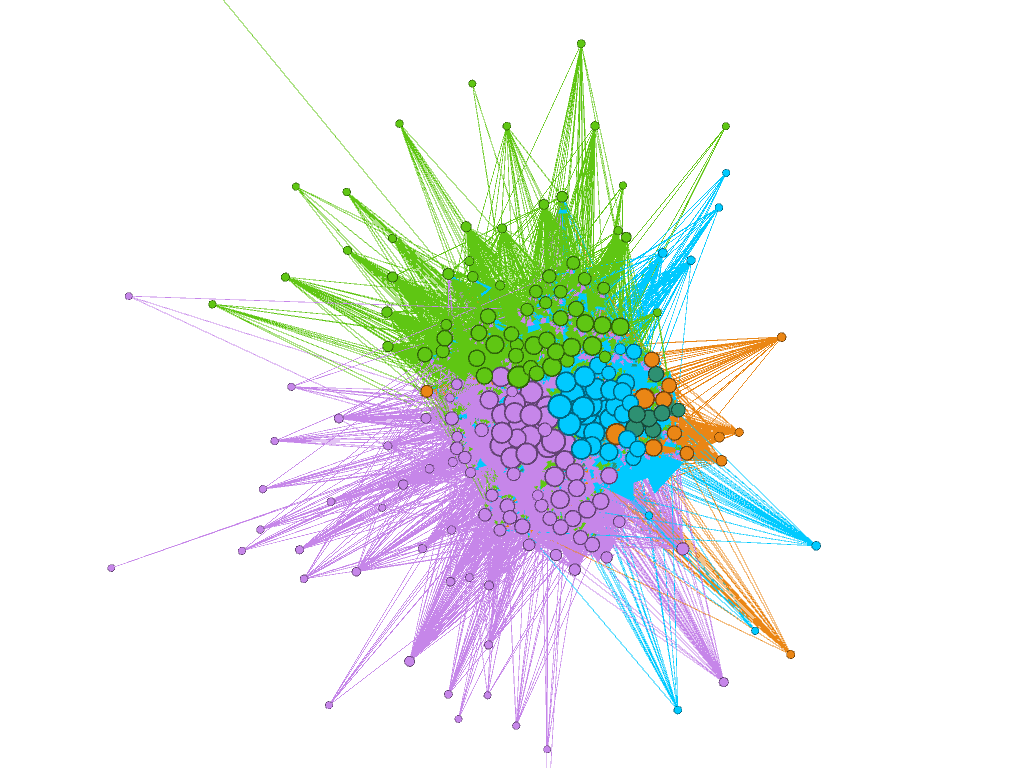

In [238]:
from IPython.display import Image
Image("Im1.png")

**5.2. Create graph using gephi. Adjust the node size based on PageRank centrality (for undirected network) and color them based on modularity value. Please import your network as png and attach to the notebook (0.5 point)**

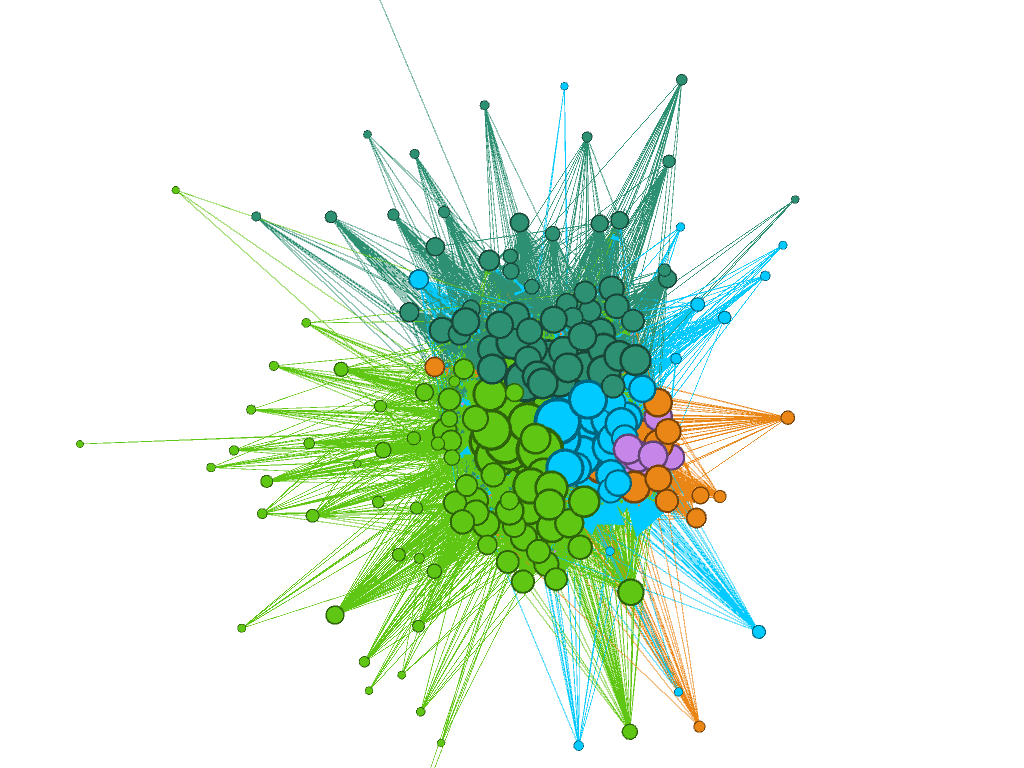

In [239]:
Image("Im2.png")

**5.3. Create graph using gephi. Adjust the node size based on eigenvector centality (for undirected network) and color them based on modularity value. Please import your network as png and attach to the notebook (0.5 point)**

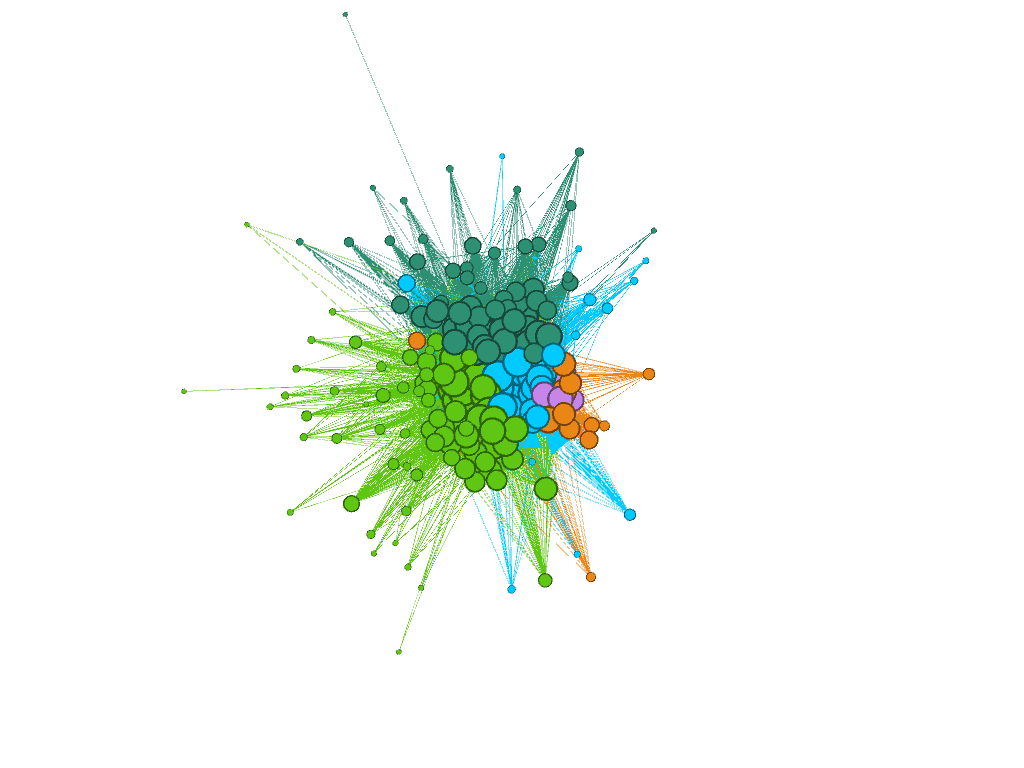

In [240]:
Image("Im3.png")

## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks. Please change X into your estimate.

<font color='red'> **Answer:**</font> X hours 

## What is the level of difficulty for this homework?
Please put a number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:**</font>